# Boston House Price Regression

### 13 개의 종속변수와 1 개의 독립변수 (주택가격 중앙값) 으로 구성

#### 종속변수 (13 개)
CRIM 자치시(town) 별 1인당 범죄율  
ZN 25,000 평방피트를 초과하는 거주지역의 비율  
INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
NOX 10ppm 당 농축 일산화질소  
RM 주택 1가구당 평균 방의 개수  
AGE 1940년 이전에 건축된 소유주택의 비율  
DIS 5개의 보스턴 직업센터까지의 접근성 지수  
RAD 방사형 도로까지의 접근성 지수  
TAX 10,000 달러 당 재산세율  
PTRATIO 자치시(town)별 학생/교사 비율  
B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함  
LSTAT 모집단의 하위계층의 비율(%)   

#### 독립변수 (1 개)
MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)  

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
boston = load_boston()
df_boston = pd.DataFrame(data=boston.data, 
                         columns=boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
X = boston.data
y = boston.target

In [4]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [5]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [7]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### model build

In [8]:
model = Sequential()

model.add(Dense(64, input_shape=(13,)))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))

In [9]:
model.compile(loss='mean_squared_error', optimizer='adam', 
              metrics=['mae', 'mse'])

epoch 수와 batchz_size 변경하며 test

In [10]:
history = model.fit(X_train, y_train, batch_size=32, 
                    epochs=500, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
12/12 [==============================] - 0s 12ms/step - loss: 590.3177 - mae: 22.4516 - mse: 590.3177 - val_loss: 517.8128 - val_mae: 20.9182 - val_mse: 517.8128
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 555.1635 - mae: 21.6170 - mse: 555.1635 - val_loss: 480.1179 - val_mae: 19.9400 - val_mse: 480.1179
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 505.6709 - mae: 20.3776 - mse: 505.6709 - val_loss: 422.9511 - val_mae: 18.3468 - val_mse: 422.9511
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 432.1366 - mae: 18.3903 - mse: 432.1366 - val_loss: 342.7730 - val_mae: 15.9473 - val_mse: 342.7730
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 335.1769 - mae: 15.4902 - mse: 335.1769 - val_loss: 247.5569 - val_mae: 12.9946 - val_mse: 247.5569
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 232.5522 - mae: 12.1004 - mse: 232.5522 - val_loss: 166.6493 

Epoch 98/500
12/12 [==============================] - 0s 2ms/step - loss: 13.5219 - mae: 2.5378 - mse: 13.5219 - val_loss: 21.7114 - val_mae: 2.9571 - val_mse: 21.7114
Epoch 99/500
12/12 [==============================] - 0s 2ms/step - loss: 13.4490 - mae: 2.5297 - mse: 13.4490 - val_loss: 21.7990 - val_mae: 2.9605 - val_mse: 21.7990
Epoch 100/500
12/12 [==============================] - 0s 2ms/step - loss: 13.4183 - mae: 2.5476 - mse: 13.4183 - val_loss: 21.6782 - val_mae: 2.9376 - val_mse: 21.6782
Epoch 101/500
12/12 [==============================] - 0s 2ms/step - loss: 13.2787 - mae: 2.5131 - mse: 13.2787 - val_loss: 21.4208 - val_mae: 2.9235 - val_mse: 21.4208
Epoch 102/500
12/12 [==============================] - 0s 2ms/step - loss: 13.2087 - mae: 2.5228 - mse: 13.2087 - val_loss: 21.5511 - val_mae: 2.9273 - val_mse: 21.5511
Epoch 103/500
12/12 [==============================] - 0s 2ms/step - loss: 13.2413 - mae: 2.4979 - mse: 13.2413 - val_loss: 21.7299 - val_mae: 2.9540 - val_m

Epoch 195/500
12/12 [==============================] - 0s 2ms/step - loss: 8.5916 - mae: 2.0304 - mse: 8.5916 - val_loss: 21.3525 - val_mae: 2.6593 - val_mse: 21.3525
Epoch 196/500
12/12 [==============================] - 0s 2ms/step - loss: 8.6132 - mae: 2.0415 - mse: 8.6132 - val_loss: 21.4029 - val_mae: 2.6603 - val_mse: 21.4029
Epoch 197/500
12/12 [==============================] - 0s 2ms/step - loss: 8.6171 - mae: 2.0461 - mse: 8.6171 - val_loss: 21.3075 - val_mae: 2.6601 - val_mse: 21.3075
Epoch 198/500
12/12 [==============================] - 0s 2ms/step - loss: 8.5744 - mae: 2.0544 - mse: 8.5744 - val_loss: 20.9303 - val_mae: 2.6413 - val_mse: 20.9303
Epoch 199/500
12/12 [==============================] - 0s 2ms/step - loss: 8.5982 - mae: 2.0585 - mse: 8.5982 - val_loss: 22.7075 - val_mae: 2.8149 - val_mse: 22.7075
Epoch 200/500
12/12 [==============================] - 0s 2ms/step - loss: 8.5868 - mae: 2.0436 - mse: 8.5868 - val_loss: 21.1491 - val_mae: 2.6233 - val_mse: 21.149

12/12 [==============================] - 0s 2ms/step - loss: 7.6011 - mae: 1.9314 - mse: 7.6011 - val_loss: 22.7268 - val_mae: 2.7719 - val_mse: 22.7268
Epoch 245/500
12/12 [==============================] - 0s 2ms/step - loss: 7.5285 - mae: 1.9413 - mse: 7.5285 - val_loss: 20.6720 - val_mae: 2.5607 - val_mse: 20.6720
Epoch 246/500
12/12 [==============================] - 0s 2ms/step - loss: 7.5001 - mae: 1.9592 - mse: 7.5001 - val_loss: 20.5908 - val_mae: 2.5604 - val_mse: 20.5908
Epoch 247/500
12/12 [==============================] - 0s 2ms/step - loss: 7.5797 - mae: 1.9193 - mse: 7.5797 - val_loss: 21.2193 - val_mae: 2.6088 - val_mse: 21.2193
Epoch 248/500
12/12 [==============================] - 0s 2ms/step - loss: 7.4270 - mae: 1.9111 - mse: 7.4270 - val_loss: 21.1893 - val_mae: 2.6214 - val_mse: 21.1893
Epoch 249/500
12/12 [==============================] - 0s 2ms/step - loss: 7.2837 - mae: 1.9025 - mse: 7.2837 - val_loss: 20.9730 - val_mae: 2.5848 - val_mse: 20.9730
Epoch 250/50

12/12 [==============================] - 0s 2ms/step - loss: 5.7607 - mae: 1.6965 - mse: 5.7607 - val_loss: 19.8501 - val_mae: 2.4662 - val_mse: 19.8501
Epoch 343/500
12/12 [==============================] - 0s 2ms/step - loss: 5.7648 - mae: 1.7003 - mse: 5.7648 - val_loss: 20.2540 - val_mae: 2.4987 - val_mse: 20.2540
Epoch 344/500
12/12 [==============================] - 0s 2ms/step - loss: 5.9598 - mae: 1.7301 - mse: 5.9598 - val_loss: 19.2486 - val_mae: 2.4145 - val_mse: 19.2486
Epoch 345/500
12/12 [==============================] - 0s 2ms/step - loss: 5.9135 - mae: 1.7534 - mse: 5.9135 - val_loss: 19.6059 - val_mae: 2.4233 - val_mse: 19.6059
Epoch 346/500
12/12 [==============================] - 0s 2ms/step - loss: 6.0823 - mae: 1.7413 - mse: 6.0823 - val_loss: 22.7502 - val_mae: 2.8661 - val_mse: 22.7502
Epoch 347/500
12/12 [==============================] - 0s 2ms/step - loss: 5.9246 - mae: 1.7417 - mse: 5.9246 - val_loss: 19.0102 - val_mae: 2.4033 - val_mse: 19.0102
Epoch 348/50

12/12 [==============================] - 0s 2ms/step - loss: 4.8139 - mae: 1.5631 - mse: 4.8139 - val_loss: 17.9111 - val_mae: 2.3552 - val_mse: 17.9111
Epoch 441/500
12/12 [==============================] - 0s 2ms/step - loss: 4.8021 - mae: 1.5630 - mse: 4.8021 - val_loss: 17.8950 - val_mae: 2.3749 - val_mse: 17.8950
Epoch 442/500
12/12 [==============================] - 0s 2ms/step - loss: 4.8841 - mae: 1.5749 - mse: 4.8841 - val_loss: 17.5457 - val_mae: 2.3559 - val_mse: 17.5457
Epoch 443/500
12/12 [==============================] - 0s 2ms/step - loss: 5.0372 - mae: 1.6356 - mse: 5.0372 - val_loss: 17.5942 - val_mae: 2.3044 - val_mse: 17.5942
Epoch 444/500
12/12 [==============================] - 0s 2ms/step - loss: 4.8457 - mae: 1.5763 - mse: 4.8457 - val_loss: 17.2746 - val_mae: 2.3270 - val_mse: 17.2746
Epoch 445/500
12/12 [==============================] - 0s 2ms/step - loss: 4.8224 - mae: 1.5665 - mse: 4.8224 - val_loss: 17.5164 - val_mae: 2.3386 - val_mse: 17.5164
Epoch 446/50

In [11]:
model.evaluate(X_test, y_test, verbose=0)

[16.080459594726562, 2.2541916370391846, 16.080459594726562]

In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

16.080459708805407
0.7965525563582969


Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

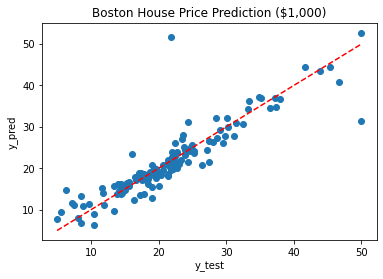

In [14]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Boston House Price Prediction ($1,000)')

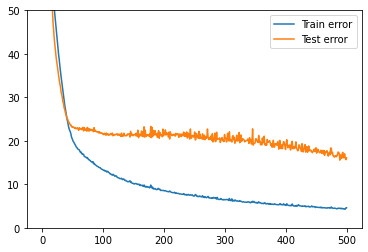

In [15]:
plt.plot(history.history['mse'], label='Train error')
plt.plot(history.history['val_mse'], label='Test error')
plt.ylim([0, 50])
plt.legend()